<a href="https://colab.research.google.com/github/GopMajak/Predicting-neurodegenerative-diseases/blob/main/Predicting_Neurodegenerative_Diseases_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Neurodegenerative Diseases Using Machine Learning Description**

This project focuses on the development of a machine learning model to accurately predict the presence of neurodegenerative diseases, aiming to facilitate early detection and intervention.
Neurodegenerative diseases, characterized by the progressive degeneration of the nervous system, include Alzheimer's disease, Parkinson's disease, and other debilitating disorders.
Early detection is critical for identifying individuals who may benefit from emerging treatments or participate in clinical trials for neuroprotective agents

Dataset: https://archive.ics.uci.edu/ml/datasets/Parkinsons

**Tasks**

*   Developed a machine learning model for early detection of neurodegenerative diseases, utilizing the UCI Parkinson's dataset to predict conditions such as Parkinson's disease with high accuracy, supporting advancements in clinical trials and treatment interventions.
*   Achieved robust performance metrics, including 93% AUC-derived accuracy and 88% error-derived accuracy, through cross-validation and boosting algorithms, demonstrating strong predictive capabilities for distinguishing between affected and healthy individuals.
*   Implemented data preprocessing and model optimization techniques, including cross-validation, performance analysis using AUC and error metrics, and iterative model refinement, ensuring reliability and scalability of the predictive framework





**Results of Predicting Neurodegenerative Diseases Using Machine Learning**

The performance of the boosting model was assessed using cross-validation, with results summarized in the cv_results DataFrame.
This included metrics such as the mean and standard deviation of AUC and error across training and test datasets at each boosting round (tree built).

Key Metrics:

AUC-Based Accuracy:
The mean AUC on the test set was used to calculate accuracy as Accuracy=1−AUC.
The final AUC-derived accuracy is approximately 93%, indicating a strong ability to distinguish between classes.

Error-Based Accuracy:
The mean error on the test set was similarly converted to accuracy as Accuracy=1−Error.
The final error-derived accuracy is approximately 88%, reflecting the model's overall correctness in predictions.

Insights:

The higher accuracy derived from AUC suggests the model excels in classification tasks where distinguishing between positive and negative classes is critical.
The slightly lower error-derived accuracy highlights areas for improvement in minimizing prediction errors across boosting rounds.

Conclusion:
The boosting model demonstrated robust performance, achieving high accuracy metrics. These results validate the model's efficacy in handling complex datasets and provide a solid
foundation for its application in predictive tasks. Further tuning and refinement could focus on reducing residual errors to enhance overall reliability.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error
from xgboost import XGBClassifier

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons.data to parkinsons.data


In [4]:
data=pd.read_csv("parkinsons.data")

In [5]:
# Let Explore the top 5 rows of the dataset by using head() method on  pandas DataFrame.
print(data.shape)
data.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# Let run info() method on DataFrameprint to get the useful information of the dataset.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# print the list of columns in the dataset to find the name of the prediction/target variable
print(data.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [8]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
# Let deop non numeric field
data=data.drop('name',axis=1)

In [13]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = data.drop(to_drop, axis=1)

print("The orginal dataframe has {} columns.".format(data.shape[1]))
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The orginal dataframe has 23 columns.
The reduced dataframe has 15 columns.


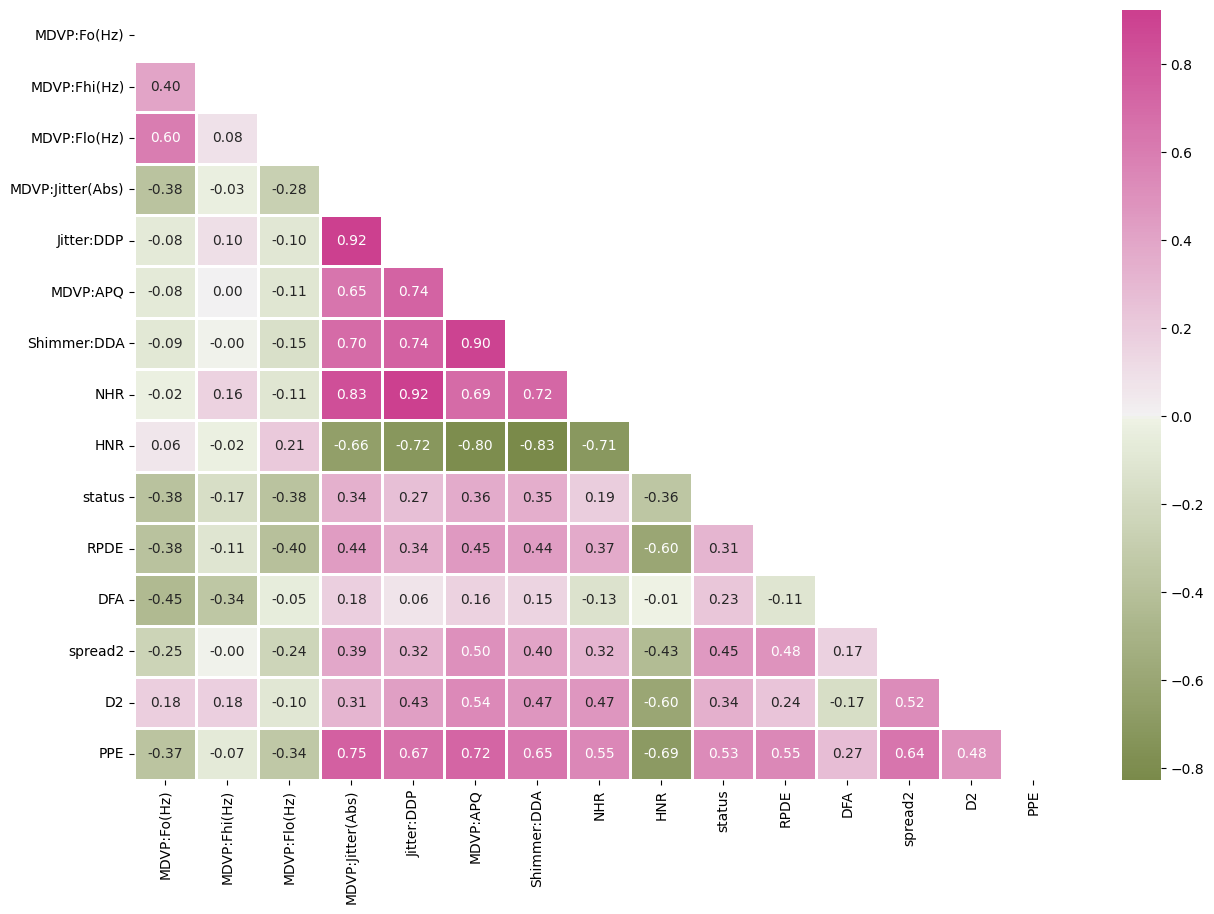

In [14]:
# Let create the correlation matrix on reduced dataframe
corr = reduced_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [15]:
# Separate the feature we want to predict from the ones to train the model on
y=reduced_df['status']
X=reduced_df.drop('status',axis=1)

In [16]:
data.corr().status.sort_values()

,status
MDVP:Fo(Hz),-0.383535
MDVP:Flo(Hz),-0.380200
HNR,-0.361515
MDVP:Fhi(Hz),-0.166136
NHR,0.189429
DFA,0.231739
Jitter:DDP,0.266646
MDVP:RAP,0.266668
MDVP:Jitter(%),0.278220
MDVP:PPQ,0.288698


In [17]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),Jitter:DDP,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,119.992,157.302,74.997,0.00007,0.01109,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00008,0.01394,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.00009,0.01633,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00009,0.01505,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.00011,0.01966,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335


In [18]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [19]:
# print the the total numbur of prediction/target variabble
print(reduced_df['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


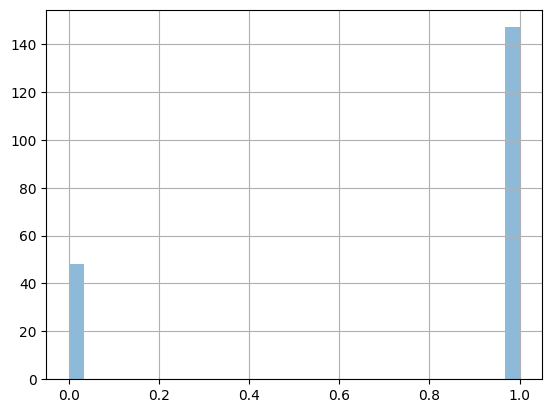

In [20]:
# Let see the distribution of status column
data.status.hist(bins=30,alpha=0.5)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=123,test_size=0.3)

### Logistic Regression Model

In [22]:
lrc=LogisticRegression(random_state=123)

In [23]:
lrc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [24]:
# Predict labels
y_pred = lrc.predict(X_test)

In [25]:
print("The accuracy of our model on test set is  {:.1%}" .format(accuracy_score(y_test,y_pred)))

The accuracy of our model on test set is  83.1%


In [26]:
print("The accuracy score of our model on training set is {:.1%}" .format(accuracy_score(y_train,lrc.predict(X_train))))

The accuracy score of our model on training set is 90.4%


In [27]:
pd.crosstab(y_test,y_pred)

col_0,0,1
status,,
0,6,9
1,1,43


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.83      0.98      0.90        44

    accuracy                           0.83        59
   macro avg       0.84      0.69      0.72        59
weighted avg       0.83      0.83      0.81        59



### SVM Classifier Model

In [29]:
# let see by using SVM classifier
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

SVC()

In [30]:
print(accuracy_score(y_test,svc.predict(X_test)))

0.8135593220338984


In [31]:
# if this accuracy is much higher than test set accuracy score, we can conclude that our model is didn't generalize well
print(accuracy_score(y_train,svc.predict(X_train)))

0.8235294117647058


###XGBoost Classifier

In [32]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [33]:
# Let define params dictionary
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 4, 'alpha': 0.1}

In [34]:
# To instantiate an XGBoost classifier object
xg_cl = xgb.XGBClassifier(objective='reg:logistic',learning_rate = 0.1, colsample_bytree = 0.3,max_depth = 5,
                          n_estimators=10,alpha=0.1,seed=123)

In [35]:
xg_cl = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=8)

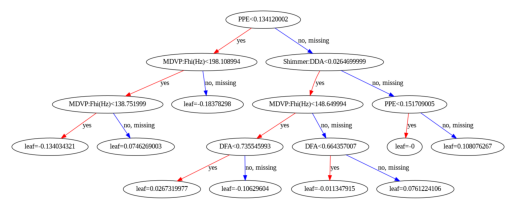

In [36]:
xgb.plot_tree(xg_cl,num_trees=4)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

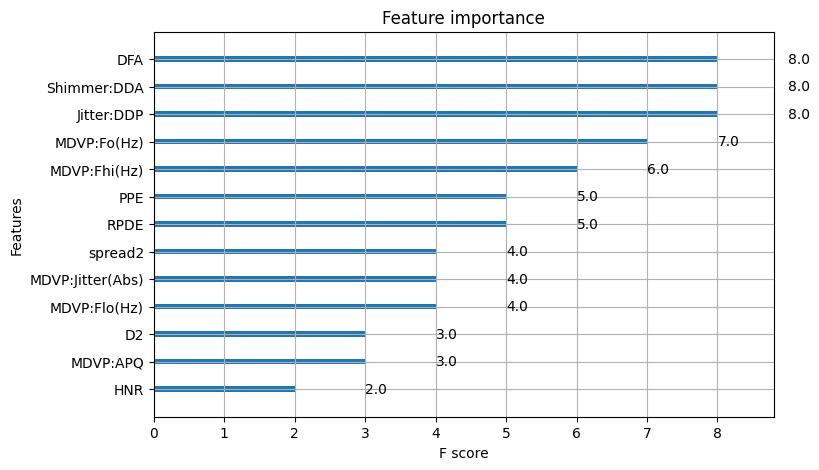

In [38]:
xgb.plot_importance(xg_cl)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#Features of Importace (Score)

Highest importance Score:

DFA highest importance score among all features.

RPDE, MDVP: Fo(Hz), and PPE, tied in features scores.

Lowest importance score are MDVP Flo (Hz) and Spread2

In [40]:
print("{} rows in test set vs. {} in training set. {} Total Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

59 rows in test set vs. 136 in training set. 14 Total Features.


In [47]:
xg_cl = XGBClassifier()
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
preds

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [48]:
# Let perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=10,early_stopping_rounds=10,
                    metrics="error", as_pandas=True, seed=123)

In [49]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.8666666666666667


In [50]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.246154,0.006281,0.246154,0.012561
1,0.246154,0.006281,0.246154,0.012561
2,0.246154,0.006281,0.246154,0.012561
3,0.246154,0.006281,0.246154,0.012561
4,0.217949,0.014505,0.246154,0.012561
5,0.156410,0.003626,0.210256,0.026149
6,0.133333,0.003626,0.189744,0.040380
7,0.120513,0.007252,0.164103,0.014505
8,0.092308,0.022646,0.153846,0.000000
9,0.076923,0.022646,0.133333,0.007252


In [51]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params,
                  nfold=4, num_boost_round=10,
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.944768       0.013963       0.804323      0.081205
1        0.968119       0.006556       0.833221      0.049763
2        0.982115       0.005599       0.870931      0.050927
3        0.993419       0.001608       0.899435      0.041930
4        0.996013       0.001501       0.909443      0.045818
5        0.995516       0.001213       0.910384      0.050250
6        0.995995       0.001706       0.914603      0.048209
7        0.997770       0.001192       0.927526      0.043880
8        0.998671       0.000686       0.933440      0.047215
9        0.998608       0.000308       0.934457      0.042575
0.9344574902610616
